In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import uproot

In [2]:
df = pd.read_csv("DATA/T3DSO2354A_CSV_ALL_1.csv", skiprows=11)
df.head()

,Second,Value,Value.1,Value.2,Value.3
0,-0.005720,-0.000250,0.1,-0.185,0.116667
1,-0.005720,-0.000500,0.1,-0.185,0.116667
2,-0.005720,-0.000417,0.1,-0.185,0.116667
3,-0.005719,-0.000167,0.1,-0.185,0.133333
4,-0.005719,-0.000500,0.1,-0.185,0.116667


Text(0, 0.5, 'Voltage [V]')

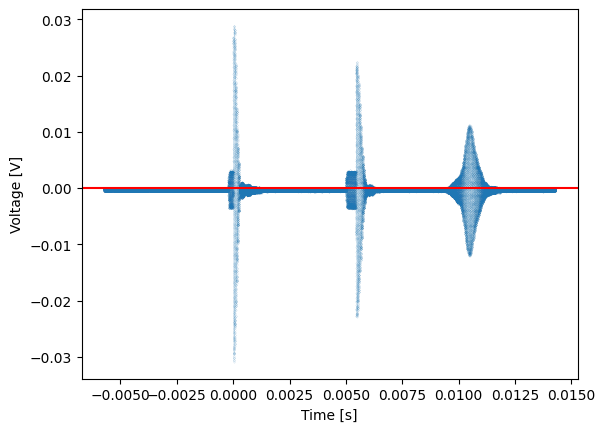

In [3]:
plt.plot(df['Second'],df['Value'],'-o', linewidth=0.05, markersize=0.05)
plt.axhline(y=0, color='r', linestyle='-' )
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

# FIRST PULSE ANALYSIS -> T2*

In [22]:
first_pulse = df[(df['Second'] > -1.5e-4) & (df['Second'] < 8.e-04)]

Text(0, 0.5, 'Voltage [V]')

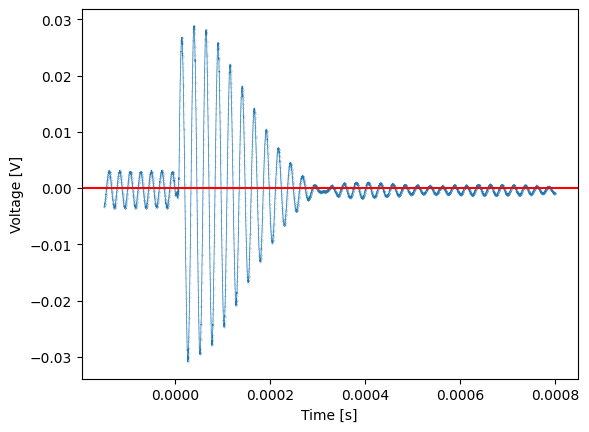

In [23]:
plt.plot(first_pulse['Second'],first_pulse['Value'],'-o', linewidth=.5, markersize=0.1)
plt.axhline(y=0, color='r', linestyle='-' )
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

In [24]:
time_values = first_pulse['Second'].values
voltage_values = first_pulse['Value'].values

# Calculate the time interval
time_interval = time_values[1] - time_values[0]

# Perform FFT
fft_values = np.fft.fft(voltage_values)
frequencies = np.fft.fftfreq(len(fft_values), d=time_interval)

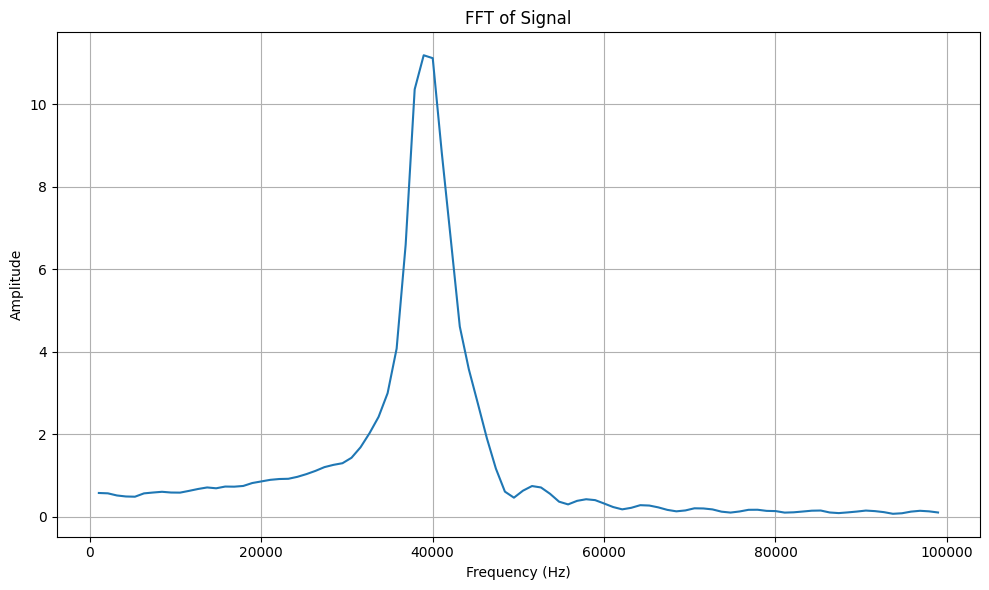

In [25]:
mask = (frequencies > 0) & (frequencies < 1e05)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[mask], np.abs(fft_values[mask]))
plt.title('FFT of Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

plt.show()

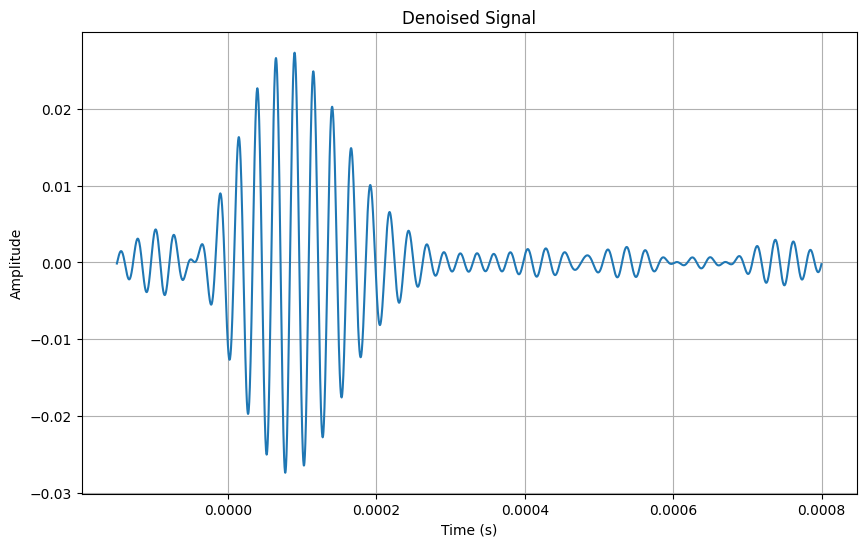

In [26]:
mask = ((frequencies > 3.5e04) & (frequencies < 4.5e04)) | (frequencies < -3.5e04) & (frequencies > -4.5e04)

filtered_fft_values = fft_values.copy()  # Make a copy to preserve original FFT values
filtered_fft_values[~mask] = 0  # Zero out frequencies outside the desired range

# Perform inverse FFT to reconstruct the denoised signal
denoised_signal = np.fft.ifft(filtered_fft_values)

# Plot the denoised signal
plt.figure(figsize=(10, 6))
plt.plot(time_values, np.real(denoised_signal))  # Use np.real() to get the real part of the signal
plt.title('Denoised Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# ECHO ANALYSIS

In [32]:
echo = df[(df['Second'] > 8e-3) & (df['Second'] < 1.35e-2)]


Text(0, 0.5, 'Voltage [V]')

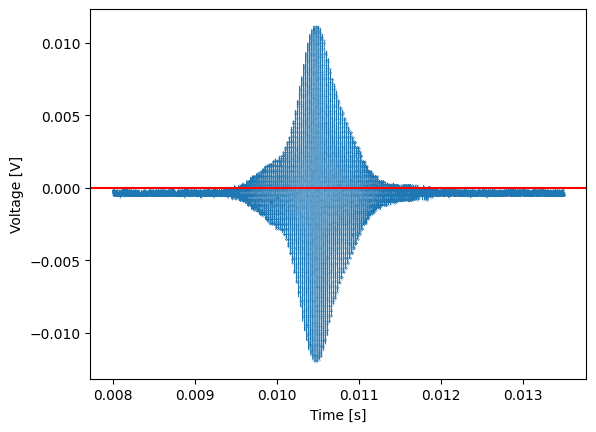

In [33]:
plt.plot(echo['Second'],echo['Value'],'-o', linewidth=.5, markersize=0.1)
plt.axhline(y=0, color='r', linestyle='-' )
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')

In [43]:
time_values = echo['Second'].values
voltage_values = echo['Value'].values

# Calculate the time interval
time_interval = time_values[1] - time_values[0]

# Perform FFT
fft_values = np.fft.fft(voltage_values)
frequencies = np.fft.fftfreq(len(fft_values), d=time_interval)

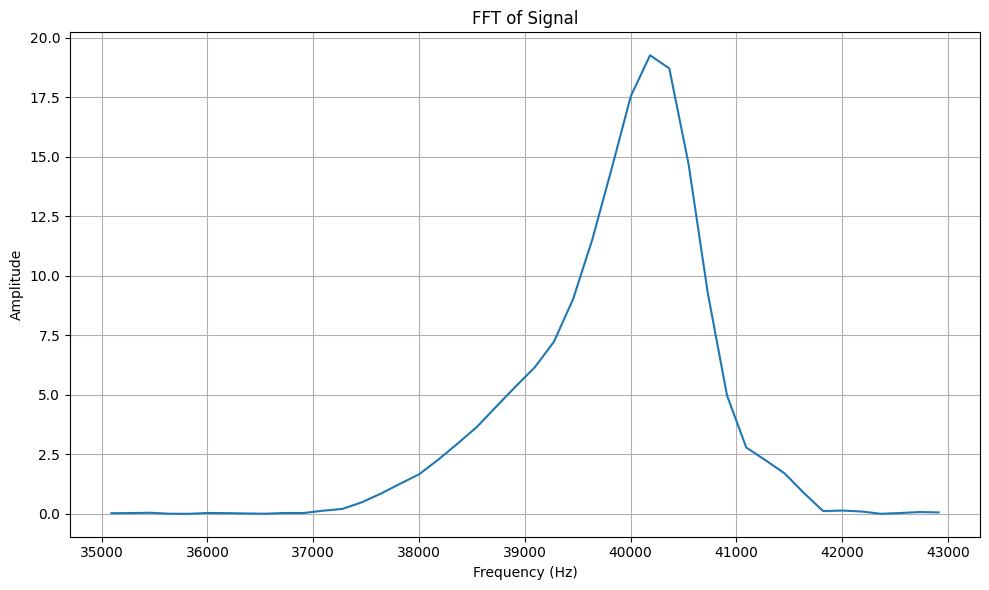

In [49]:
mask = (frequencies > 3.5e4) & (frequencies < 4.3e4)
plt.figure(figsize=(10, 6))
plt.plot(frequencies[mask], np.abs(fft_values[mask]))
plt.title('FFT of Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

plt.show()

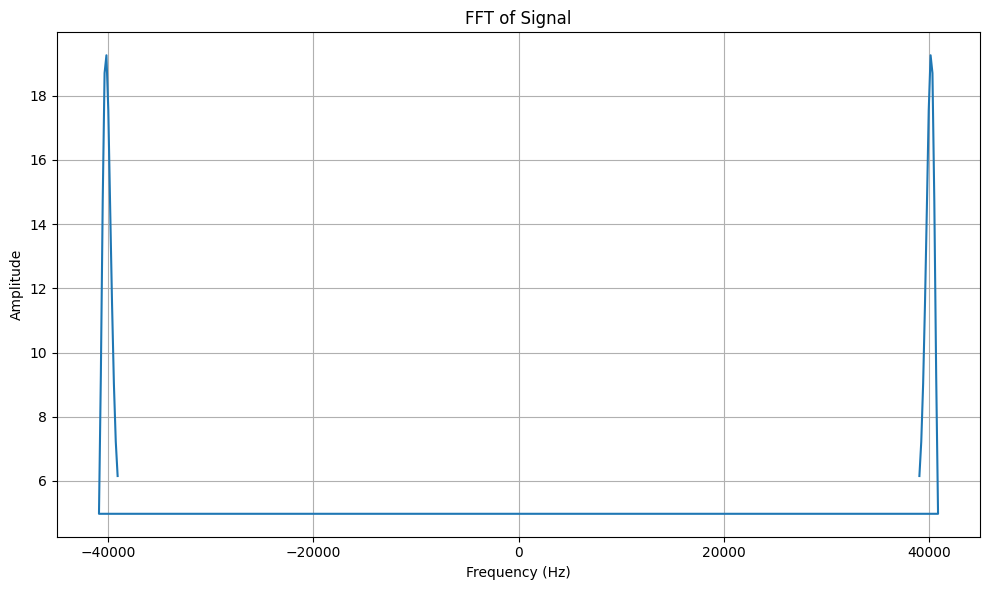

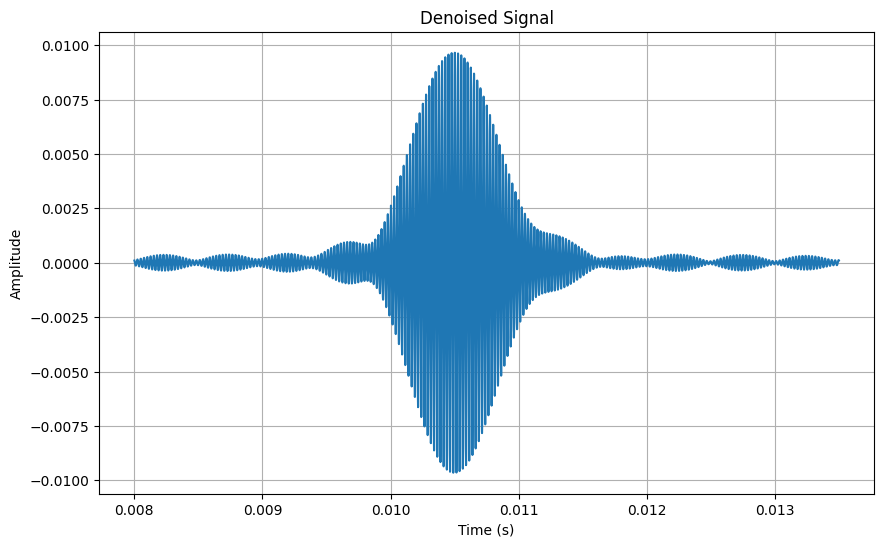

In [50]:
mask = ((frequencies > 3.9e04) & (frequencies < 4.1e04)) | (frequencies < -3.9e04) & (frequencies > -4.1e04)

filtered_fft_values = fft_values.copy()  # Make a copy to preserve original FFT values
filtered_fft_values[~mask] = 0  # Zero out frequencies outside the desired range

# Perform inverse FFT to reconstruct the denoised signal
denoised_signal = np.fft.ifft(filtered_fft_values)

plt.figure(figsize=(10, 6))
plt.plot(frequencies[mask], np.abs(filtered_fft_values[mask]))
plt.title('FFT of Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()

plt.show()
# Plot the denoised signal
plt.figure(figsize=(10, 6))
plt.plot(time_values, np.real(denoised_signal))  # Use np.real() to get the real part of the signal
plt.title('Denoised Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()